# Naive Summation
This application analyzes the numerical errors of the naive summation (sequential accumulation) algorithm. Random numbers between -1 and 1 are generated and summed in lists of varying sizes (from 100 up to 100,000 elements). The “true” sum is computed with high precision (longdouble) and compared with the naive summation result. Both absolute error and relative error are measured and plotted on log-log scales. The results show that absolute error grows steadily with n, while relative error fluctuates more due to cancellation effects among positive and negative numbers. This application visually demonstrates that naive summation is numerically unstable and unreliable for large-scale summations.

## Mathematical Background

The naive summation algorithm performs sequential accumulation:

$$
s_0 = 0, \quad s_k = s_{k-1} + x_k \quad (1 \leq k \leq n)
$$

So the final result is:

$$
\tilde{S} = \sum_{i=1}^{n} x_i
$$

However, in floating-point arithmetic each addition introduces a small rounding error $\varepsilon_k$ such that:

$$
fl(a + b) = (a + b)(1 + \varepsilon_k), \quad |\varepsilon_k| \leq \varepsilon_{machine}
$$

Therefore, the computed result of naive summation can be written as:

$$
\tilde{S} = \sum_{i=1}^n x_i \prod_{k=i}^n (1 + \varepsilon_k)
$$

From error analysis, the forward error bound is approximately:

$$
| \tilde{S} - S | \leq n \cdot \varepsilon_{machine} \cdot \sum_{i=1}^n |x_i| + O(\varepsilon_{machine}^2)
$$

This shows that the absolute error can grow **linearly with n**.


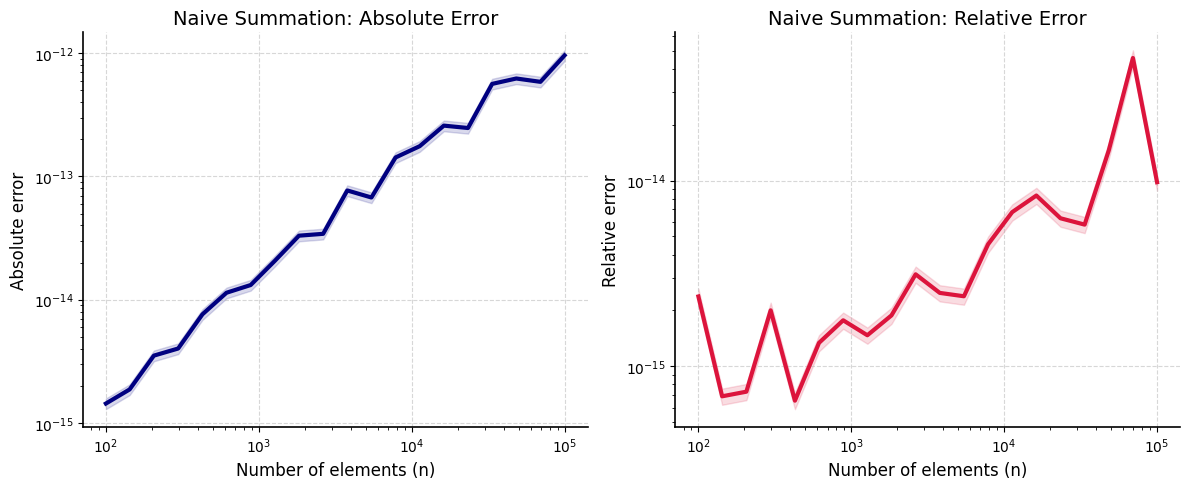

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Naive summation: sequential accumulation
def naive_sum(x):
    total = 0.0
    for val in x:
        total += val
    return total

# Error analysis
def error_analysis(trials=5):
    ns = np.logspace(2, 5, num=20, dtype=int)  # 100 → 100000, 30 points
    abs_errors, rel_errors = [], []

    for n in ns:
        trial_abs, trial_rel = [], []
        for _ in range(trials):
            x = np.random.uniform(-1, 1, n)
            true_sum = np.sum(x, dtype=np.longdouble)
            naive_result = naive_sum(x)

            abs_err = abs(naive_result - true_sum)
            rel_err = abs_err / (abs(true_sum) + 1e-20)

            trial_abs.append(abs_err)
            trial_rel.append(rel_err)

        abs_errors.append(np.mean(trial_abs))
        rel_errors.append(np.mean(trial_rel))

    return ns, abs_errors, rel_errors

# Run analysis
ns, abs_errors, rel_errors = error_analysis(trials=20)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Common style
def clean_axis(ax, xlabel, ylabel, title):
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # arrow-like axes
    ax.spines['left'].set_position(('axes', 0))
    ax.spines['bottom'].set_position(('axes', 0))
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

    # only major grid (no minor messy lines)
    ax.grid(True, which="major", ls="--", lw=0.8, alpha=0.5)

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)

# Absolute error plot
axes[0].plot(ns, abs_errors, linewidth=3, color="navy")
axes[0].fill_between(ns, np.array(abs_errors)*0.9, np.array(abs_errors)*1.1, 
                     color="navy", alpha=0.15)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
clean_axis(axes[0], "Number of elements (n)", "Absolute error", "Naive Summation: Absolute Error")

# Relative error plot
axes[1].plot(ns, rel_errors, linewidth=3, color="crimson")
axes[1].fill_between(ns, np.array(rel_errors)*0.9, np.array(rel_errors)*1.1, 
                     color="crimson", alpha=0.15)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
clean_axis(axes[1], "Number of elements (n)", "Relative error", "Naive Summation: Relative Error")

plt.tight_layout()
plt.show()
